# College Student Placement Dataset

Dataset Description:

This dataset simulates the academic and professional profiles of 10,000 college students, focusing on factors that influence placement outcomes. It includes features like IQ, academic performance, CGPA, internships, communication skills, and more.

Columns Description:

- College_ID : 	Unique ID of the college (e.g., CLG0001 to CLG0100)
- IQ :	Student’s IQ score (normally distributed around 100)
- Prev_Sem_Result : GPA from the previous semester (range: 5.0 to 10.0)
- CGPA : Cumulative Grade Point Average (range: ~5.0 to 10.0)
- Academic_Performance : Annual academic rating (scale: 1 to 10)
- Internship_Experience	 : Whether the student has completed any internship (Yes/No)
- Extra_Curricular_Score : Involvement in extracurriculars (score from 0 to 10)
- Communication_Skills :Soft skill rating (scale: 1 to 10)
- Projects_Completed :	Number of academic/technical projects completed (0 to 5)
- Placement :Final placement result (Yes = Placed, No = Not Placed)

Target Variable:

- Placement: This is the binary classification target (Yes/No) that can be predicted based on the other features.

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
df=pd.read_csv("college_student_placement_dataset.csv")

In [ ]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
# Dataset shape
df.shape

(10000, 10)

In [ ]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [ ]:
# Statistical Summary
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [ ]:
# Check Missing values
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [ ]:
# Check for duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
# Remove unwanted columns
df.drop(columns=['College_ID'], inplace=True)

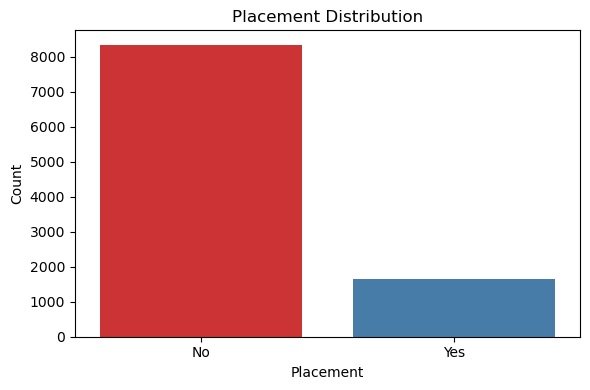

In [ ]:
# Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Placement", hue="Placement", palette="Set1", dodge=False, legend=False)
plt.title("Placement Distribution")
plt.xlabel("Placement")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

INTERPRETATIONS:

- There is a major imbalance in placement outcomes:
The number of successful placements is much lower than non-placements.

In [ ]:
# Seperate categorical and numeric columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed'],
      dtype='object')
Categorical Columns: Index(['Internship_Experience', 'Placement'], dtype='object')


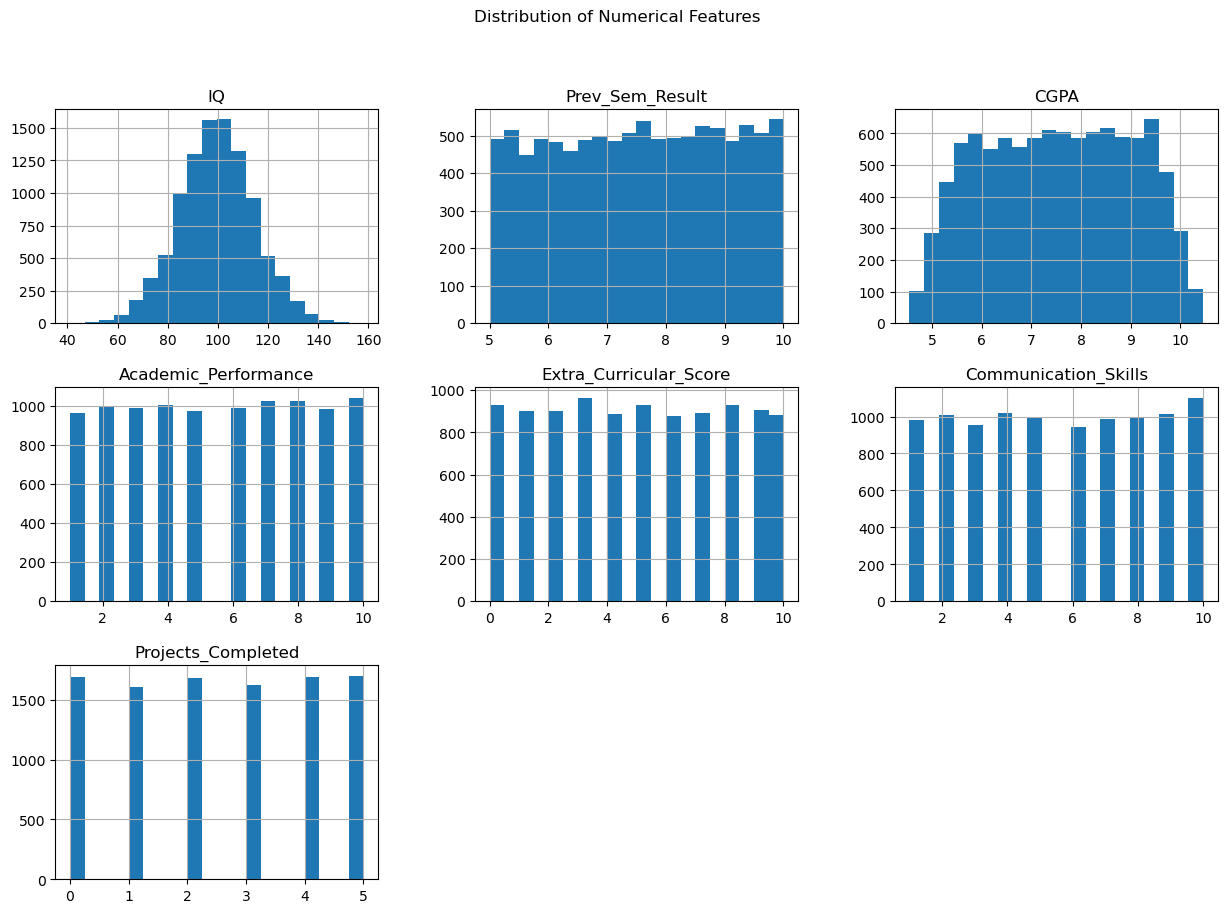

In [ ]:
# Numerical Feature Distribution
df[num_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

INTERPRETATIONS:

1. IQ Distribution
- The IQ histogram is shaped like a normal (bell-shaped) distribution.
- Most students have IQ around 100–110.
- Very few students lie at extreme low or high IQ ranges.

2. Previous Semester Result
- Values span mainly between 5 to 10 GPA scale.
- Students have mixed academic history—no extreme bias toward very low or very high scores.

3. CGPA
- CGPA values mostly lie between 5 and 10, with many students clustered around 7 to 9.
- Fewer students are at very low or maximum ranges.

4. Academic Performance
- performance levels are evenly represented, each category having a similar number of students.

5. Communication Skills
- Most students score between 7 and 10, Indicates generally strong communication skills among students.

6. Projects Completed
- Most students have completed between 1 and 10 projects.
- Distribution looks reasonably spread, with slight tendency toward higher numbers.

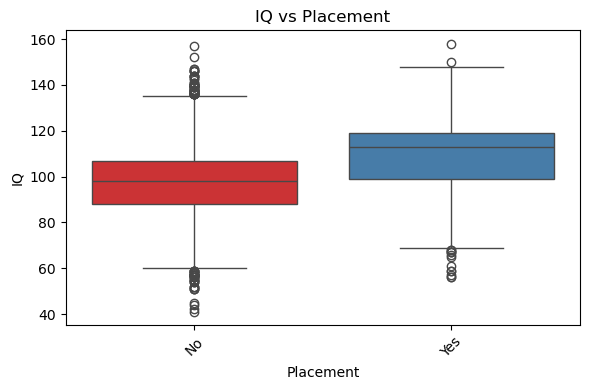

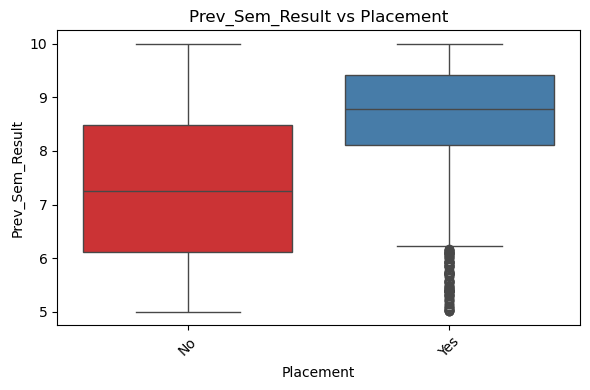

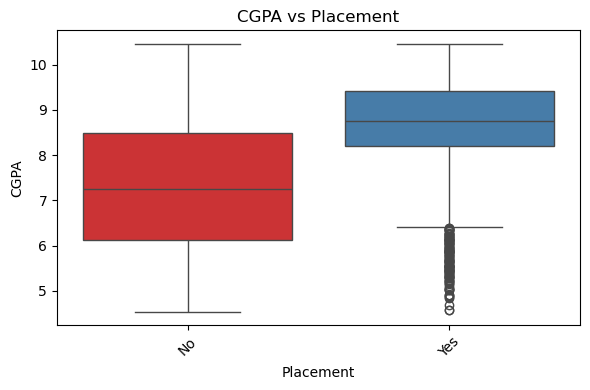

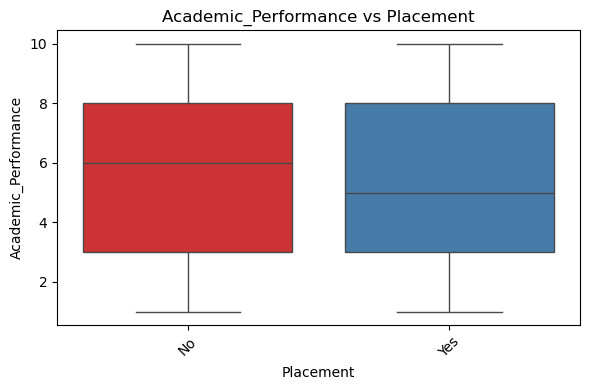

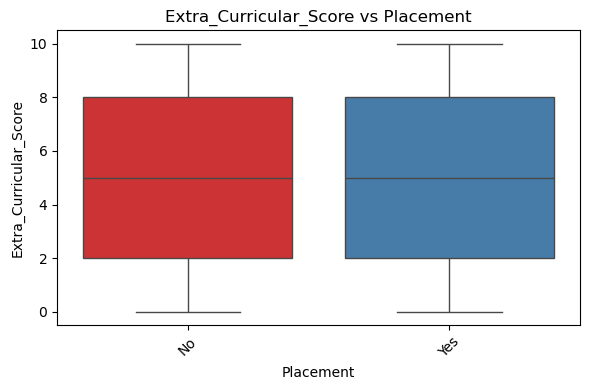

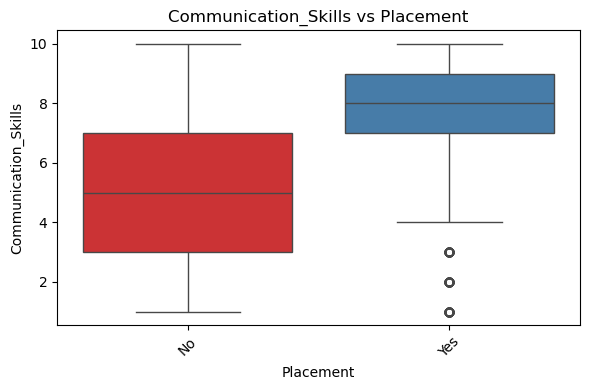

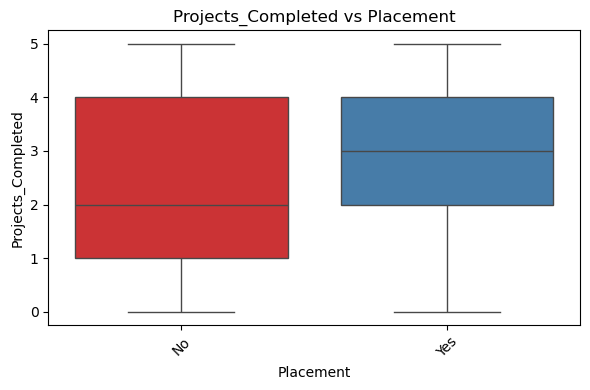

In [ ]:
# Numerical vs Target variable

target_col = "Placement"

for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(6,4))

        sns.boxplot(x=df[target_col], y=df[col], hue=df[target_col], palette='Set1', dodge=False, legend=False)
        plt.title(f"{col} vs {target_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

INTERPRETATIONS:

1. IQ vs Placement:
- Both groups show variation roughly between 60 and 140+.
- Placed students (Yes) have a higher median IQ than non-placed.
- Students with higher IQ scores tend to have better placement outcomes.
- Both categories have outliers at the low (≈40–60) and high (≈140–150+) ends.

2. Prev_Sem_Result vs Placement:
- Median value for placed students is higher.
- Distribution shows strong academic consistency helps placement.

3. CGPA vs Placement: Placed students have significantly higher CGPAs.

4. Academic_Performance vs Placement:
- Placed students cluster higher in academic performance.
- Non-placed group shows lower median and wider spread.
- Indicates students consistently performing well academically are more likely to be hired.

5. Extra_Curricular_Score vs Placement:
- Median Values Are Almost the Same
- Extra-curricular activities do not significantly influence placement outcomes in this dataset.

6. Communication Skill vs Placement: Placed students show a higher median communication score.

7. Projects_Completed vs Placement:
- Placed group median > Non-placed median.
- Students who completed more projects tend to be placed

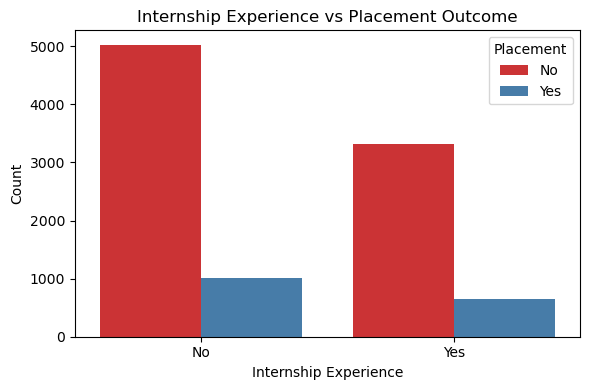

In [ ]:
# Internship Experience vs Placement

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Internship_Experience", hue="Placement", palette="Set1")
plt.title("Internship Experience vs Placement Outcome")
plt.xlabel("Internship Experience")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

INTERPRETATIONS:

Students with internship experience are more likely to be placed than students without internships.

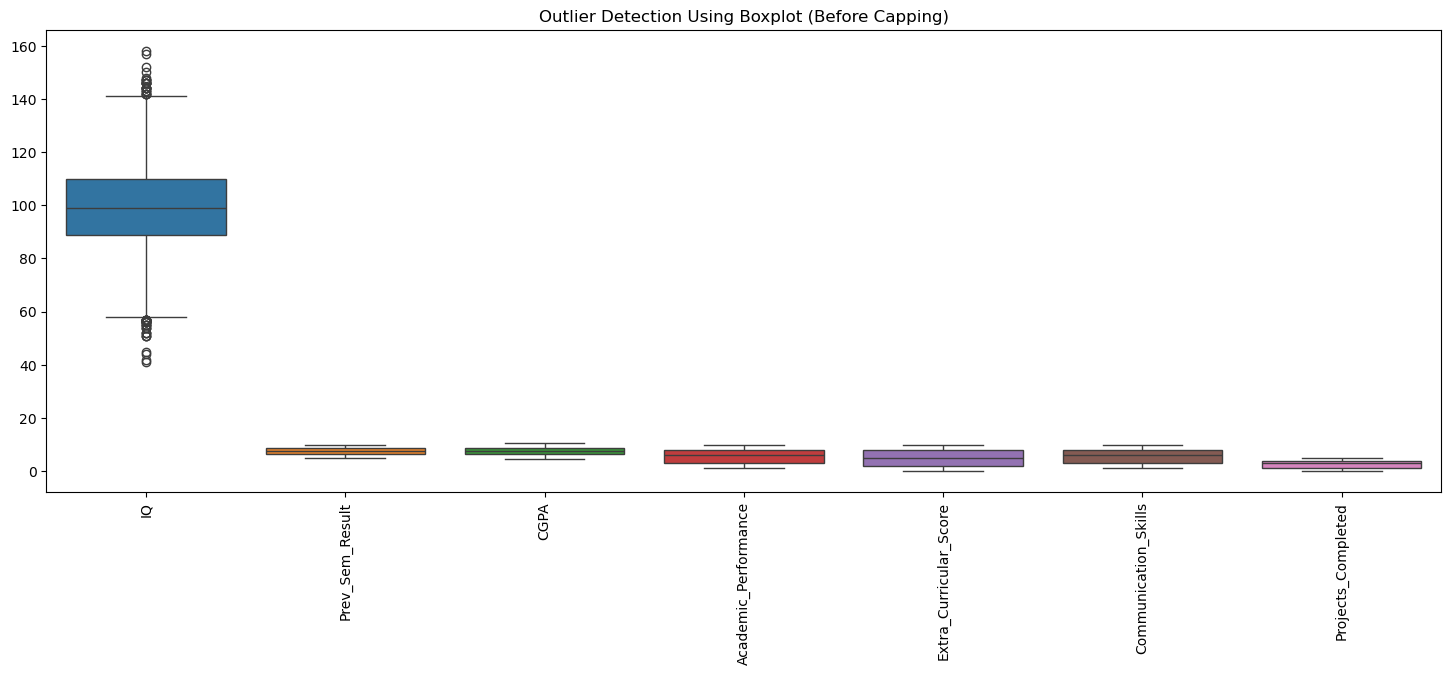

In [ ]:
# Outlier Detection
plt.figure(figsize=(18,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Outlier Detection Using Boxplot (Before Capping)")
plt.show()

In [ ]:
# Capping outliers
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the values
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Apply capping
df = cap_outliers(df, num_cols)

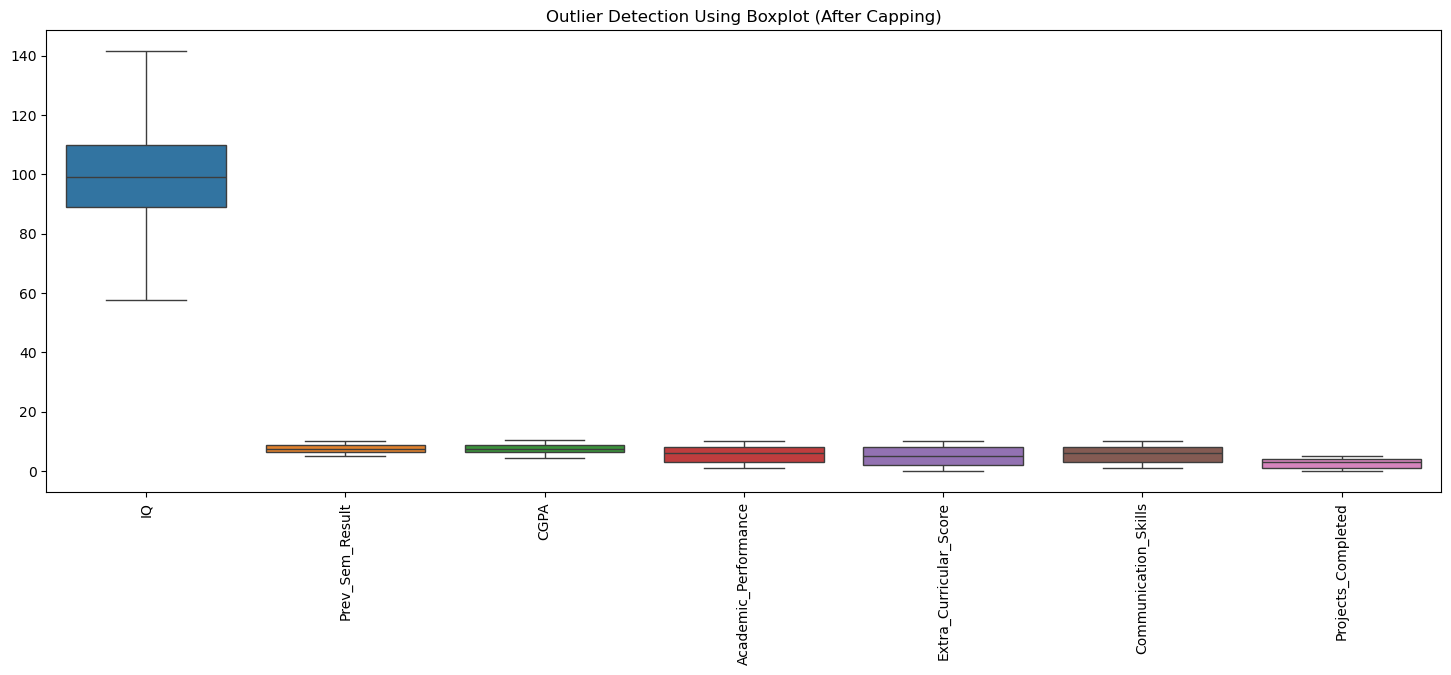

In [ ]:
# Boxplot after capping outliers
plt.figure(figsize=(18,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Outlier Detection Using Boxplot (After Capping)")
plt.show()

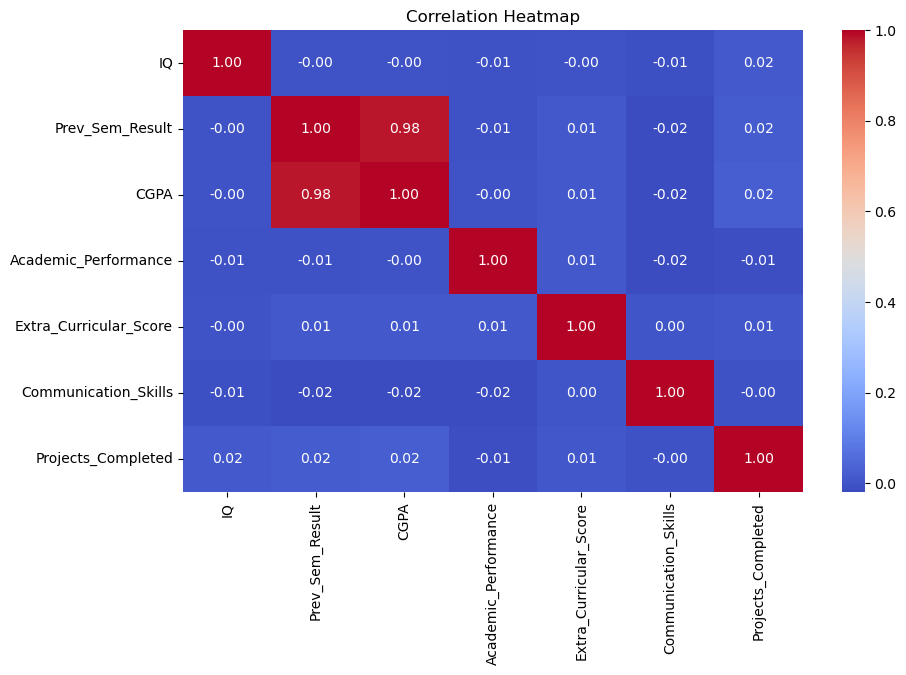

In [ ]:
# Correlation Matrix
corr = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

INTERPRETATIONS:

- Prev_Sem_Result and CGPA are highly correlated (~0.98)
- Almost all other relationships show values around 0.00 to -0.02, These variables are not strongly related to one another.
- IQ, communication, and extracurricular abilities do not heavily influence placements.

In [ ]:
# Encode Categorical Columns
le = LabelEncoder()

for col in df.select_dtypes(include=['object']):
    df[col] = le.fit_transform(df[col])

print(df.head())

      IQ  Prev_Sem_Result  CGPA  Academic_Performance  Internship_Experience  \
0  107.0             6.61  6.28                   8.0                      0   
1   97.0             5.52  5.37                   8.0                      0   
2  109.0             5.36  5.83                   9.0                      0   
3  122.0             5.47  5.75                   6.0                      1   
4   96.0             7.91  7.69                   7.0                      0   

   Extra_Curricular_Score  Communication_Skills  Projects_Completed  Placement  
0                     8.0                   8.0                 4.0          0  
1                     7.0                   8.0                 0.0          0  
2                     3.0                   1.0                 1.0          0  
3                     1.0                   6.0                 1.0          0  
4                     8.0                  10.0                 2.0          0  


In [ ]:
# Remove highly correlated feature
df = df.drop(columns=['Prev_Sem_Result'])

In [ ]:
# Split Features & Target
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
y.value_counts()

Placement
0    8341
1    1659
Name: count, dtype: int64

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Define Models

models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', LogisticRegression(max_iter=1000))
    ]),

    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', SVC(probability=True))
    ]),

    "Decision Tree": Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', DecisionTreeClassifier(random_state=42))
    ]),

    "Random Forest": Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', RandomForestClassifier(random_state=42))
    ]),

    "Gradient Boosting": Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', GradientBoostingClassifier(random_state=42))
    ]),

    "AdaBoost": Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', AdaBoostClassifier(random_state=42))
    ]),

    "XGBoost": Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False))
    ])
}

In [ ]:
# Update Parameter grids
param_grids = {
    "Logistic Regression": {
        'model__C': [0.01, 0.1, 1, 10]
    },

    "SVM": {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    },

    "Random Forest": {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    },

    "Gradient Boosting": {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1]
    },

    "XGBoost": {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.05, 0.1],
        'model__subsample': [0.8, 1.0]
    }
}

In [ ]:
# Training & Evaluation
results = []
best_f1 = 0
best_model_name = None
best_model = None

for name, model in models.items():
    print(f"\n========== {name} ==========")

    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)
    f1        = f1_score(y_test, y_test_pred)

    # Cross-validation F1 for robustness
    cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()

    results.append([name, train_acc, test_acc, f1, cv_f1])

    # Print metrices
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy : {test_acc:.4f}")
    print(f"F1-score         : {f1:.4f}")
    print(f"CV F1-score      : {cv_f1:.4f}")
    print(classification_report(y_test, y_test_pred))

    # Select best model based on CV F1
    if cv_f1 > best_f1:
        best_f1 = cv_f1
        best_model = model
        best_model_name = name


========== Logistic Regression ==========
Training Accuracy: 0.8531
Testing Accuracy : 0.8670
F1-score         : 0.6780
CV F1-score      : 0.6628
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1668
           1       0.57      0.84      0.68       332

    accuracy                           0.87      2000
   macro avg       0.77      0.86      0.80      2000
weighted avg       0.90      0.87      0.88      2000


========== SVM ==========
Training Accuracy: 0.9434
Testing Accuracy : 0.9460
F1-score         : 0.8560
CV F1-score      : 0.8264
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1668
           1       0.77      0.97      0.86       332

    accuracy                           0.95      2000
   macro avg       0.88      0.95      0.91      2000
weighted avg       0.96      0.95      0.95      2000


========== Decision Tree ==========
Training Accuracy: 1.0000
Testi

C:\Users\sheetal\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:37:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sheetal\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:37:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sheetal\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:37:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sheetal\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:37:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.up

Training Accuracy: 1.0000
Testing Accuracy : 1.0000
F1-score         : 1.0000
CV F1-score      : 0.9966
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# Summary table
results_df = pd.DataFrame(results, columns=['Model', 'Train Acc', 'Test Acc', 'F1', 'CV F1'])
print("\n======= Summary =======")
print(results_df.sort_values(by='CV F1', ascending=False))

print(f"\nBest model based on CV F1: {best_model_name} with CV F1 = {best_f1:.4f}")


======= Summary =======
                 Model  Train Acc  Test Acc        F1     CV F1
4    Gradient Boosting   0.999875    0.9985  0.995475  0.999623
5             AdaBoost   1.000000    1.0000  1.000000  0.999623
2        Decision Tree   1.000000    0.9985  0.995475  0.998870
3        Random Forest   1.000000    0.9995  0.998492  0.996967
6              XGBoost   1.000000    1.0000  1.000000  0.996607
1                  SVM   0.943375    0.9460  0.856000  0.826448
0  Logistic Regression   0.853125    0.8670  0.677966  0.662800

Best model based on CV F1: Gradient Boosting with CV F1 = 0.9996


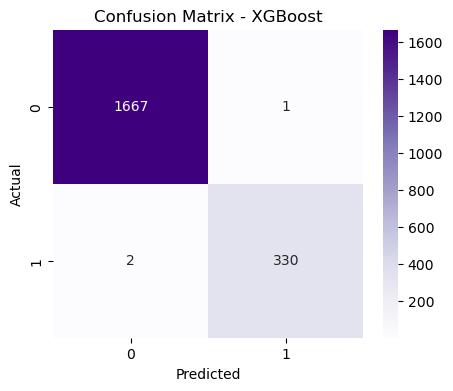

In [ ]:
# Confusion matrix for the best model
y_test_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Actual vs Predicted values
df_compare = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_best
})
print(df_compare.head(20))

      Actual  Predicted
2208       0          0
3893       0          0
9061       0          0
5645       0          0
4607       0          0
823        0          0
1760       0          0
893        1          1
7855       0          0
5028       0          0
981        1          1
9055       0          0
3014       0          0
1580       0          0
6560       0          0
7439       0          0
7945       0          0
1351       0          0
570        0          0
238        0          0


In [ ]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print(f"\nBest model '{best_model_name}' saved as 'best_model.pkl'.")


Best model 'Gradient Boosting' saved as 'best_model.pkl'.


In [ ]:
# Load the saved model
best_model = joblib.load('best_model.pkl')

In [ ]:
# New unseen data
new_data = pd.DataFrame({
    'IQ': [120, 7],
    'CGPA': [8.5, 5.5],
    'Academic_Performance': [88, 40],
    'Internship_Experience': [1, 0],
    'Extra_Curricular_Score': [75, 20],
    'Communication_Skills': [80, 30],
    'Projects_Completed': [3, 1]
})

In [ ]:
# Predict class labels
predictions = best_model.predict(new_data)
print("Predicted Placement (0=No, 1=Yes):", predictions)

Predicted Placement (0=No, 1=Yes): [1 0]


In [ ]:
# Predict probabilities for class 1 (optional)
probabilities = best_model.predict_proba(new_data)[:, 1]

In [ ]:
# Combine results into a DataFrame
results = pd.DataFrame({
    'Predicted_Placement': predictions,
    'Probability_Yes': probabilities
})

print("Predictions for new data:")
print(results)

Predictions for new data:
   Predicted_Placement  Probability_Yes
0                    1         0.999963
1                    0         0.000066


INTERPRETATION:

1. First row

- Predicted = 1 → model predicts the student will be placed
- Probability = 0.999963 → 99.9963% confident that this student should be placed
- Student features: high IQ, high CGPA, good scores → aligns with high probability

2. Second row

- Predicted = 0 → model predicts the student will NOT be placed
- Probability = 0.000066 → 0.0066% chance of being placed
- Student features: very low IQ, poor grades, no internship → aligns with low probability